<a href="https://colab.research.google.com/github/prajwalDU/Hotel-Booking-analysis/blob/main/final_EDA_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions                
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.                 
Explore and analyze the data to discover important factors that govern the bookings.**

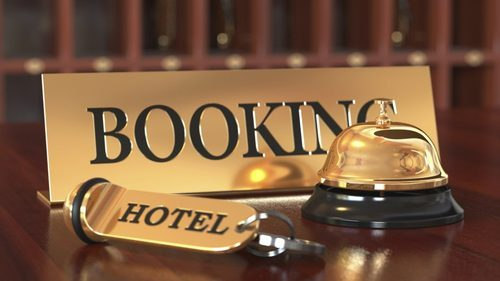

## **IMPORTING LIBRARIES** 

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mtick

import seaborn as sns
sns.set_style("dark")

In [2]:
# Mounting drive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing Dataset
data = '/content/drive/MyDrive/almabetter/python/EDA Capstone Project Python/Hotel Bookings.csv'
df = pd.read_csv(data)

This data set contains a single file that compares various booking information between two hotels: a city hotel and a resort hotel. This dataset is prepared for various city and resort hotels from Lisbon, Portugal.

In [6]:
# Check the first 5 rows of Data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# Check the last 5 rows of Data
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
# The shape of dataset
df.shape

(119390, 32)

In [9]:
# Checking datatype and Null value count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
# Columns name present in our dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Some explanations for unknown terms: Lead time: Timespan between the reservation of a hotel room and checkin.

1.Meal categories: BB (Bed and Breakfast), HB (half board, in which breakfast and dinner are included), FB (full board, in which breakfast, lunch, and dinner are included), SC (self-catering or no meals are included).         
2.Market Segment: Type of booking (Online/Offline travel Agent (TA), Tour Operators (TO), Direct booking or from a Corporate company for business purposes).            
3.Room types: A, B, C, D, E, F, G, H (Code of room type reserved. Code is presented instead of designation for anonymity reasons).            
4.ADR: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.             
5.Total special requests: Number of special requests made by the customer (e.g. twin bed or high floor).

# DATA CLEANING AND PREPARATION

In [12]:
# Checking null values in all columns and rows.
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [13]:
# Checking null values and sum it
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

SO as we seen above we have 4 features with missing values
in the company, agent, country and children column.

In [14]:
# Finding the null values and there percentages in all column
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)}).reset_index()
null

,index,Null Values,Percentage Null Values
0,hotel,0,0.000000
1,is_canceled,0,0.000000
2,lead_time,0,0.000000
3,arrival_date_year,0,0.000000
4,arrival_date_month,0,0.000000
5,arrival_date_week_number,0,0.000000
6,arrival_date_day_of_month,0,0.000000
7,stays_in_weekend_nights,0,0.000000
8,stays_in_week_nights,0,0.000000
9,adults,0,0.000000


As we see above more than 93% null values in 'company' column we need to drop that column to avoid further errors in analysis.    
 Similarly column 'Agent' have 13 percent null values whenever using 'Agent' column in future we will drop that null rows or we can replace null values by zero'0'.        
We can also see some values that are null in 'country' column we can replace them by Other Countries         
In our dataset there are some rows in which adult,children and babies have value 0 at same time which is not possible , so we will drop that rows.

In [15]:
# Droping company column(contains more null values)
df=df.drop(['company'], axis = 1)

In [16]:
# Replacing null values to other countries in country column
df['country'].fillna('Other Countries',inplace=True)

In [17]:
# Replacing null values to 0 in agent column
df['agent'].fillna('0',inplace=True)

There are many rows that have zero guests including adults,children,babies. These type of row does not make sense

In [18]:
# Check the shape contain zero guests
df[(df.adults+df.babies+df.children)== 0].shape

(180, 31)

we have 180 such rows, we will just drop these rows.

In [19]:
# Droping rows which contain guests zero
df = df.drop(df[(df.adults+df.babies+df.children)== 0].index)

## **EXPLORATORY DATA ANALYSIS**

Now let's do the fun part, extract the information from our data and try to answer our questions.

In [20]:
df.shape

(119210, 31)

## Q1 Which year the hotels (both city and resort) have the highest footfall?




In [21]:
data1 = df[df['is_canceled'] == 0]

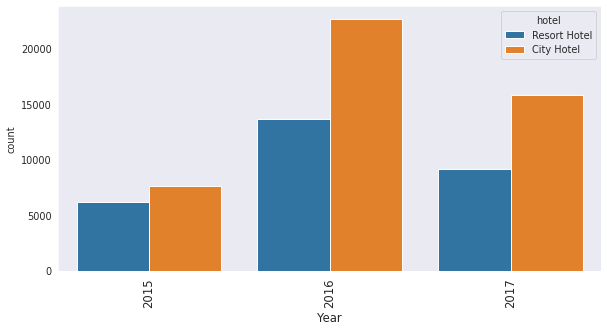

In [22]:
# Ploting using seaborn(sns) countplot
fig = plt.figure(figsize=(10,5), dpi = 70)
sns.countplot(data=data1, x = 'arrival_date_year',hue="hotel")
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=90,fontsize=12);

The above plot shows that 2016 was the busiest year and 2015 was the least 

## Q2 Which are the top 10 countries from travelers and tourists visit the hotels?

In [23]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [24]:
# Showing top 10 country visited hotel 
top_10_countries = country_wise_guests.iloc[:10]
top_10_countries

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
5,IRL,2542
6,ITA,2428
7,BEL,1868
8,NLD,1716
9,USA,1592


In [25]:
print(f'Higest number of guests comes from {top_10_countries.iloc[:1,:1]}')

Higest number of guests comes from   country
0     PRT


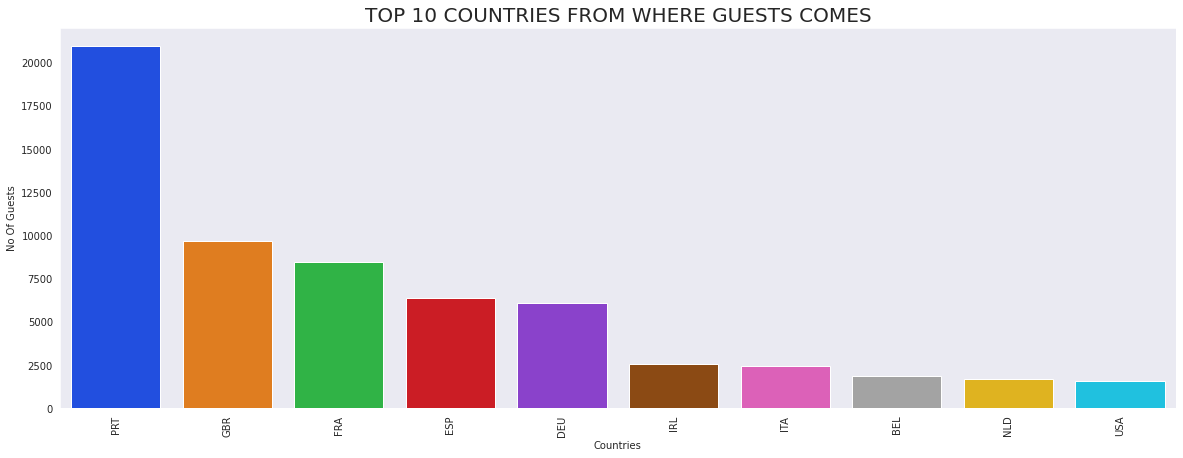

In [26]:
plt.rcParams['figure.figsize'] = (20, 7)
ax = sns.barplot(x =country_wise_guests['country'][:10], y  = country_wise_guests['No of guests'][:10], palette = 'bright')
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_ylabel(ylabel = 'No Of Guests', fontsize = 10)
ax.set_title(label = 'TOP 10 COUNTRIES FROM WHERE GUESTS COMES', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

This graph shows top 10 countries from where most of the guest visits the hotels.
From Portugal hotels has highest number visitors with respect to all countries
Most of the vistors are from European countries

# Q3 What type of Bookings is majorly seen in the hotels?

In [27]:
bookings = data1['market_segment'].value_counts()
bookings

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

In [28]:
# Show the booking market segment using pie chart
label=['Online TA ','Offline TA/TO ','Direct','Groups','Corporate','Complementary','Aviation']
piechart= px.pie(bookings,names=bookings.index,values=bookings.values,title='BOOKING ACCORDING TO MARKET SEGMENT')
piechart.update_traces(rotation=90,textinfo="percent+label")

We all know in the current world, people’s use of technology is massively increased and we can see in the above plot that almost half percent of reservations are applied via Online Travel Agents. Offline TA/TO comes next which displays the considerably good contribution of the employment in the Travel and Tourism sector.

## Q4 How much customer pay in for accomodation per night ?

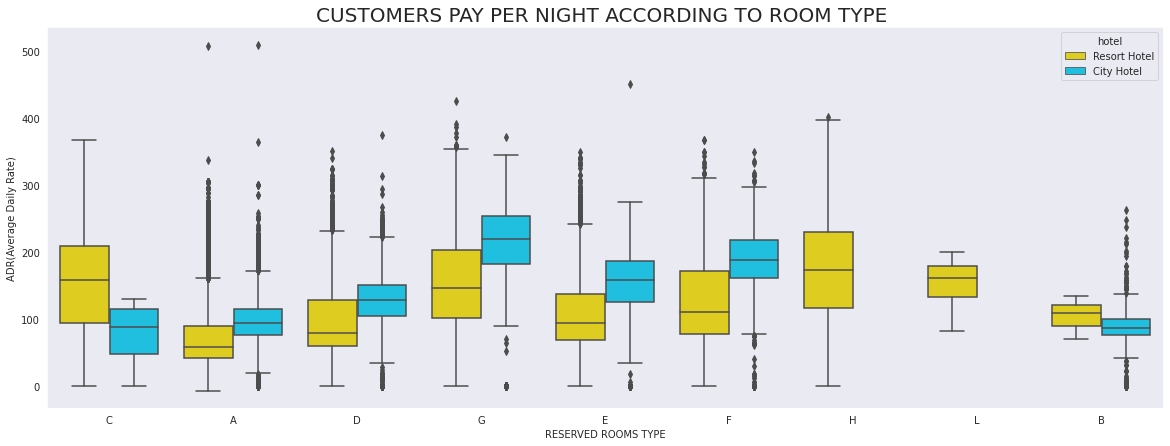

In [29]:
plt.rcParams['figure.figsize'] = (20, 7)
bx =sns.boxplot(data=data1,x='reserved_room_type',y='adr',hue='hotel',palette='jet_r')
bx.set_xlabel(xlabel = 'RESERVED ROOMS TYPE', fontsize = 10)
bx.set_ylabel(ylabel = 'ADR(Average Daily Rate)', fontsize = 10)
bx.set_title(label = 'CUSTOMERS PAY PER NIGHT ACCORDING TO ROOM TYPE ', fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

Above Box plot shows reserved rooms type with respect to ADR(Average Daily Rate), here we see in A,D,G,E,F,H and B has outliers, Yellow shows Resort hotel and blue shows City hotel.

## Q5 What is the booking relation between Resort Hotel and City Hotel?

In [30]:
# Writing function to simplify our task
def get_count(series, limit=None):
  '''
  INPUT :
    series: Pandas Series (Single column from DataFrame)
    limit:  If value given, limit the output value to first limit samples.
  OUTPUT :
    x = Unique values
    y = Count of unique values
  '''

  if limit != None:
    series = series.value_counts()[:limit]
  else:
    series = series.value_counts()

  x = series.index
  y = series/series.sum()*100

  return x.values,y.values

This function takes a series or data frame column and return the two arrays

x is our unique values      
y is the percentage values of each unique

now let's use this function on our **is_canceled** feature and see the result



In [31]:
x,y = get_count(df['is_canceled'])

In [32]:
x,y

(array([0, 1]), array([62.92341247, 37.07658753]))

**is_canceled** have two unique values: 1 if booking got canceled, else 0.

Now let's plot this result. I will write another function to plot the diagram. The good thing about writing function is that we can reuse the code again and again.

In [33]:
def plot(x, y, x_label=None, y_label=None, title=None, figsize=(7,5), type='bar'):

  '''
  INPUT :    
          x:       Array containing values for x_axis
          y:       Array containing values for y_axis
          x_label: string value for x_axis label
          y_label: string value for x_axis label
          title:   string values for plot title
          figsize: tuple value, for figure size
          type:    type of plot (default is bar plot)

  OUTPUT :
          Display the plot

  '''

  fig, ax = plt.subplots(figsize=figsize)
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())

  if x_label != None:
    ax.set_xlabel(x_label)
  if y_label != None:
    ax.set_ylabel(y_label)
  if title != None:
    ax.set_title(title)
  
  if type == 'bar':
    sns.barplot(x,y, ax = ax)
  elif type == 'line':
    sns.lineplot(x,y, ax = ax, sort=False)

  plt.show()

This function takes two arrays x and y and displays the required diagrams. The default plot type is a bar plot, but it can also plot the line plot. optional aruguments can be given to display title and labels.
Now let's call the funtion

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



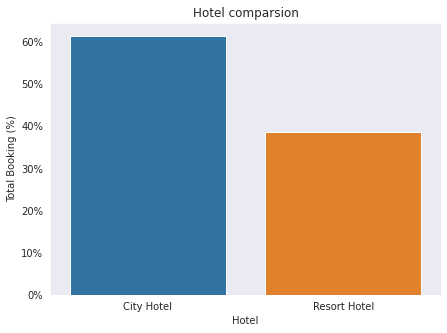

In [34]:
x,y = get_count(data1['hotel'])
plot(x,y, x_label = 'Hotel', y_label = 'Total Booking (%)', title = 'Hotel comparsion')

More than 60% of the population booked the City Hotel

## Q6 Find Top 20 agents with highest bookings?

In [35]:
agent_id=df['agent'].value_counts().reset_index()
agent_id.columns = ['agent', 'no. of booking']
agt_df=pd.DataFrame(agent_id[:20])
agt_df

,agent,no. of booking
0,9.0,31922
1,0,16280
2,240.0,13922
3,1.0,7187
4,14.0,3633
5,7.0,3532
6,6.0,3290
7,250.0,2870
8,241.0,1721
9,28.0,1657


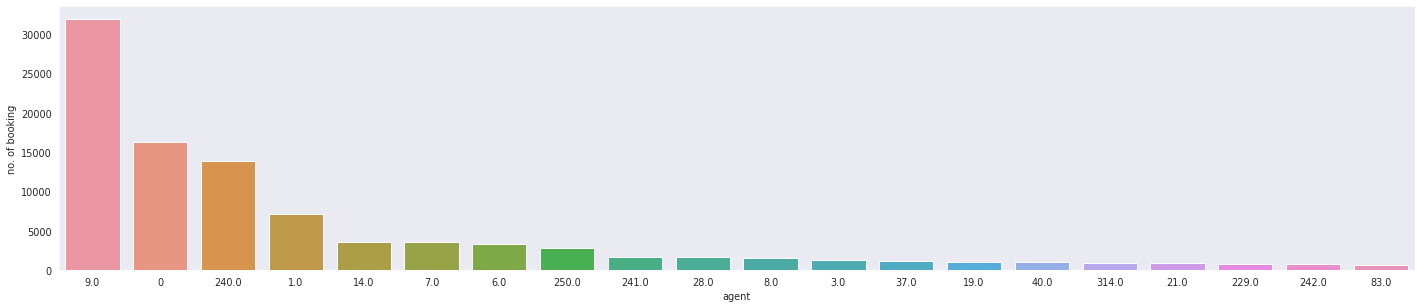

In [36]:
fig = plt.figure(figsize=(25,5), dpi = 70)
sns.barplot(data=agt_df, x='agent', y='no. of booking', order=agt_df.sort_values('no. of booking',ascending = False).agent)

## Q7 Which was the most booked accommodation type (Single, Couple, Family)?

We will divide people staying in the hotel into 3 categories.       
Single: 1 Adult only
Couple: 2 Adults we can’t say for sure that these two people are an actual couple or not, data does not tell us anything about this, but we will assume they are couple :P         
Family or Friends: More than 2 people including adults, children, and babies. (or alternatively, we can call it a group)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



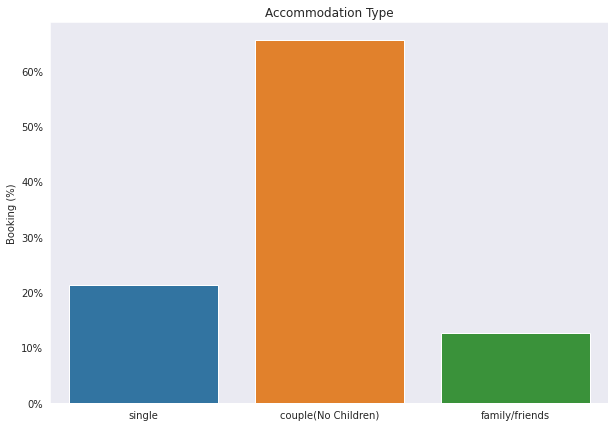

In [37]:
# Select single, Couple, multiple adults and family
single = data1[(data1.adults == 1) & (data1.children == 0) & (data1.babies == 0)]
couple = data1[(data1.adults == 2) & (data1.children == 0) & (data1.babies == 0)]
family = data1[data1.adults + data1.children + data1.babies > 2]

# Make the list of category names, and their total percentage
names = ['single', 'couple(No Children)', 'family/friends']
count = [single.shape[0], couple.shape[0], family.shape[0]]
count_per = [x/data1.shape[0]*100 for x in count]

# Draw the curve
plot(names, count_per, y_label = 'Booking (%)', title = 'Accommodation Type', figsize = (10,7))

Couple(or adults) is the most popular accommodation type. So hotels can make plans accordingly

## Q8 What is the busiest month for hotels?

To answer this question, we will select the arrival_date_month feature and get its value count. now the resulting data will not be sorted according to month order so we have to sort it. we will make the new list with the names of months in order to sort our data according to this list.

We will display the Lineplot and separate the data for each hotel type, and display the trend.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



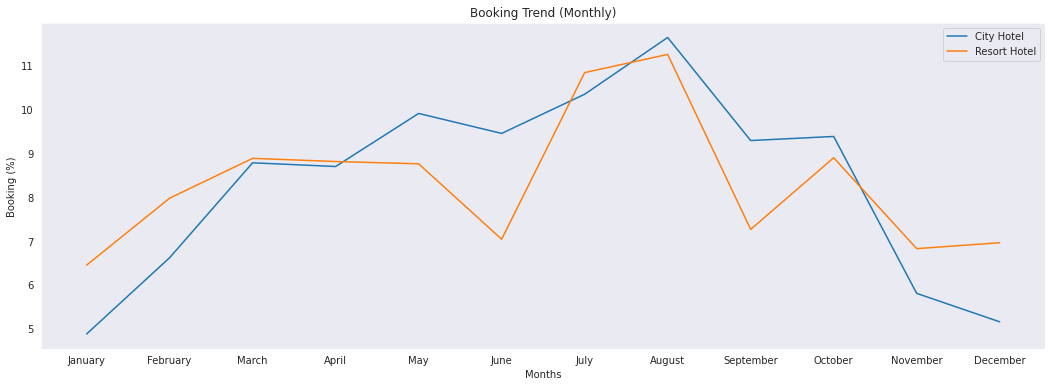

In [38]:
# Order of Months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Select only City Hotel
sorted_months = data1.loc[df.hotel== 'City Hotel', 'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

# Select only Resort Hotel
sorted_months = data1.loc[df.hotel== 'Resort Hotel', 'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

# Draw the line plot
fig, ax = plt.subplots(figsize = (18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')

sns.lineplot(x1, y1.values, label = 'City Hotel', sort = False)
sns.lineplot(x2, y2.values, label = 'Resort Hotel', sort = False)

plt.show()

Resort has more bookings at July and August month, and least booking in June, September, and start and end of the year.         
Similarly Hotel has more booking in July and August, and the least bookings were made at the start and end of the year.

## Q9 Booking cancellation as per month

In [39]:
cancel_data = df[df['is_canceled'] == 1]

In [40]:
cancel_data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22


In [41]:
resort_hotel_cancel_df = cancel_data[df['hotel']=='Resort Hotel']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [42]:
resort_cancel = resort_hotel_cancel_df['arrival_date_month'].value_counts().reset_index()
resort_cancel.columns=['month','no of guests']
resort_cancel 

,month,no of guests
0,August,1637
1,July,1436
2,April,1059
3,May,1024
4,June,1007
5,September,1006
6,October,978
7,February,794
8,March,763
9,December,631


In [43]:
city_hotel_cancel_df = cancel_data[df['hotel']=='City Hotel']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [44]:
city_cancel = city_hotel_cancel_df['arrival_date_month'].value_counts().reset_index()
city_cancel.columns=['month','no of guests']
city_cancel 

,month,no of guests
0,May,3653
1,August,3600
2,June,3527
3,April,3459
4,July,3301
5,October,3268
6,September,3109
7,March,2385
8,February,1899
9,December,1737


In [45]:
cancel_merged_df = resort_cancel.merge(city_cancel,on='month')
cancel_merged_df.columns=['month','resort hotel cancellation','city hotel cancellation']
cancel_merged_df

,month,resort hotel cancellation,city hotel cancellation
0,August,1637,3600
1,July,1436,3301
2,April,1059,3459
3,May,1024,3653
4,June,1007,3527
5,September,1006,3109
6,October,978,3268
7,February,794,1899
8,March,763,2385
9,December,631,1737


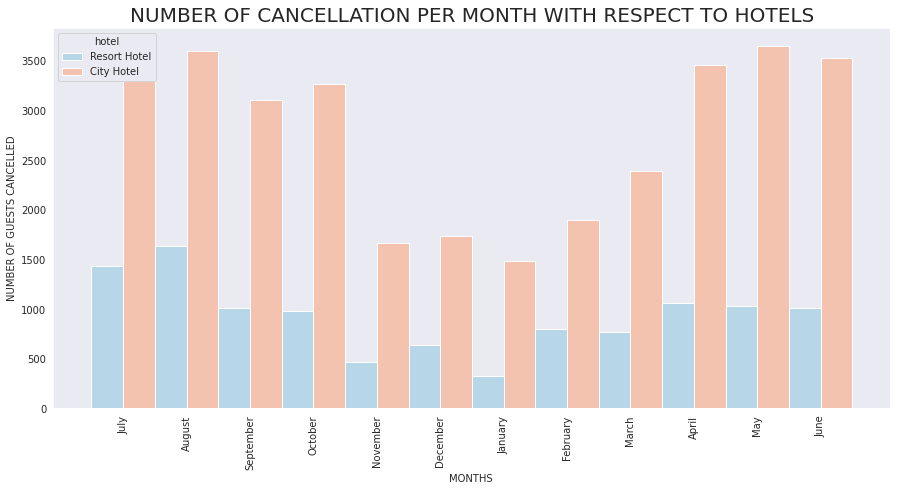

In [46]:
plt.rcParams['figure.figsize'] = (15, 7)
ex = sns.histplot(data=cancel_data,x='arrival_date_month',hue='hotel',multiple='dodge',palette='RdBu_r')
ex.set_xlabel(xlabel = 'MONTHS ', fontsize = 10)
ex.set_ylabel(ylabel = 'NUMBER OF GUESTS CANCELLED', fontsize = 10)
ex.set_title(label = 'NUMBER OF CANCELLATION PER MONTH WITH RESPECT TO HOTELS', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

## Q10 Finding the occupancy and level of profitability over months

In [47]:
resort_hotel_df = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']== 0)]

In [48]:
resort_hotel = resort_hotel_df.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [49]:
data_city_df = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [50]:
city_hotel = data_city_df.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [51]:
both_hotel_df = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
both_hotel_df.columns = ['months', 'price_for_resort_hotel', 'price_for_city_hotel']
both_hotel_df

,months,price_for_resort_hotel,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


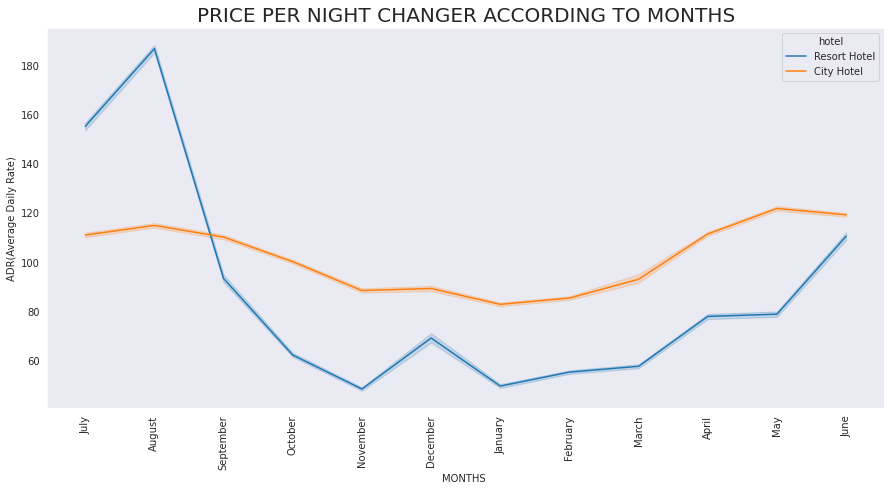

In [52]:
plt.rcParams['figure.figsize'] = (15, 7)
cx = sns.lineplot(data=df,x='arrival_date_month',y='adr',hue='hotel')
cx.set_xlabel(xlabel = 'MONTHS ', fontsize = 10)
cx.set_ylabel(ylabel = 'ADR(Average Daily Rate)', fontsize = 10)
cx.set_title(label = 'PRICE PER NIGHT CHANGER ACCORDING TO MONTHS', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

## Q11 How long the customer stays in the hotel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



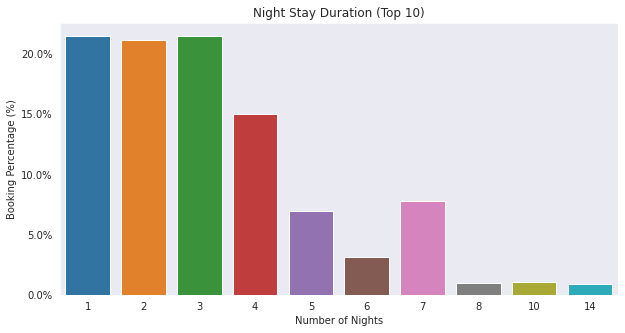

In [53]:
total_nights = data1['stays_in_weekend_nights']+ data1['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



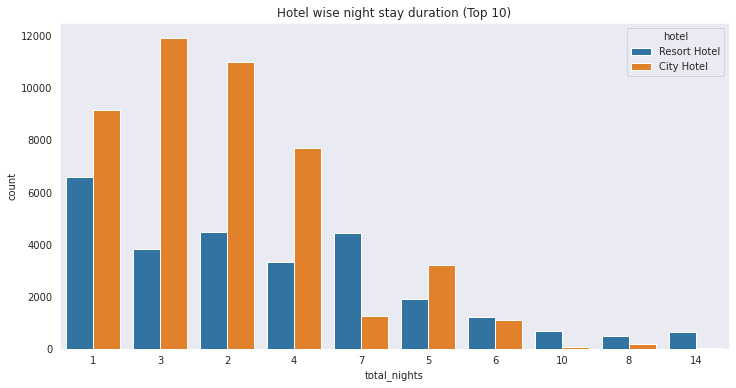

In [54]:
data1.loc[:,'total_nights'] = data1['stays_in_weekend_nights']+ data1['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=data1,
              order = data1.total_nights.value_counts().iloc[:10].index, ax=ax);

## **Feature Selection and Feature Engineering**

In [55]:
# Selecting the column which has to show in Heat map,
keep_list=['is_canceled', 'lead_time', 'arrival_date_year', 
       'arrival_date_day_of_month', 'adults', 'children','is_repeated_guest', 'previous_cancellations',
        'booking_changes', 'agent',
        'days_in_waiting_list', 'adr',]
for col in df.columns:
     if col not in keep_list:
            del df[col]

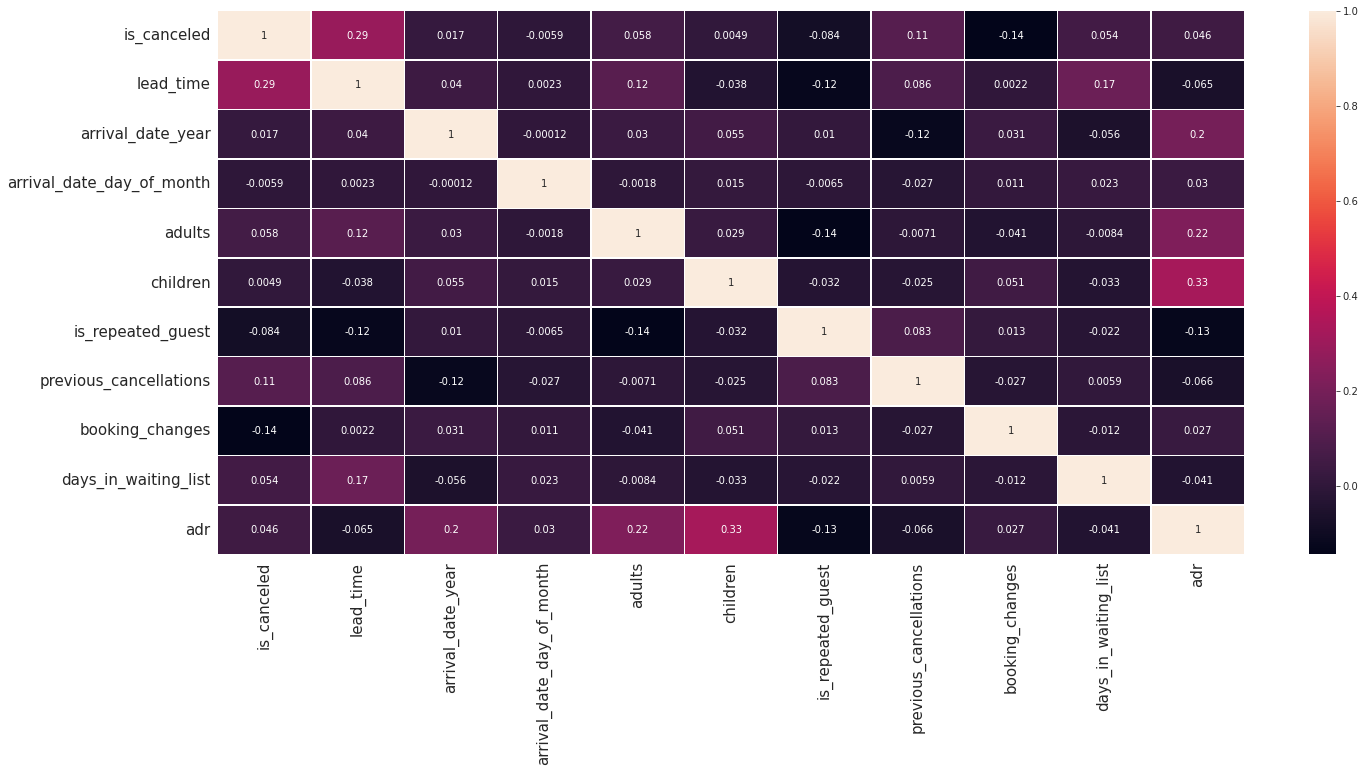

In [56]:
# Ploting heat map 
f,ax = plt.subplots(figsize=(23, 10))
plt.xticks(rotation=20,fontsize=15 );
plt.yticks(fontsize=15);
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
sns. set(font_scale=2)

# **Conclusion**
Top Hotel - City Hotel. Top meal - Bread and Breakfast. Top Agent - Agent No. 9. Top room type - A              
One out of every three bookings are cancelled.       
People prefer to tour more in August.         
Most preferred meal is BB(Bread and Breakfast.          
Online marketing is the best way to attract customers.        
People do not want to pre-deposit the money for booking.             
Most of the visitors are couples.            
Resort hotel is preferred mostly for longer stay,day time stays. and when the parking space is needed.                  
More than 15 days advance bookings have high chances of cancellation.    
Direct bookings have very less cancellation%.            
Best time to book a hotel is in January.               
Average days in advance booking : 77 days              
Average nights spent by visitors: 3                   
Most visitors are from these countries: Portugal, Britain, France, Spain and Germany.              
Total Special requests and the revenue depends more on total members arrived.